## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [131]:
import pandas as pd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [12]:
boston = pd.read_csv("BostonHousing.csv")

In [13]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


###### Baseado no exercício anterior já sabemos que os dados já estão prontos para serem lidos pelo sklearn

In [14]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


#### Irei usar como variaveis para a regressão de ``medv``: ``lstat`` e ``rm`` que como é mostrado na tabela de correlação, tem uma melhor correlação com ``medv``

<Axes: xlabel='lstat', ylabel='medv'>

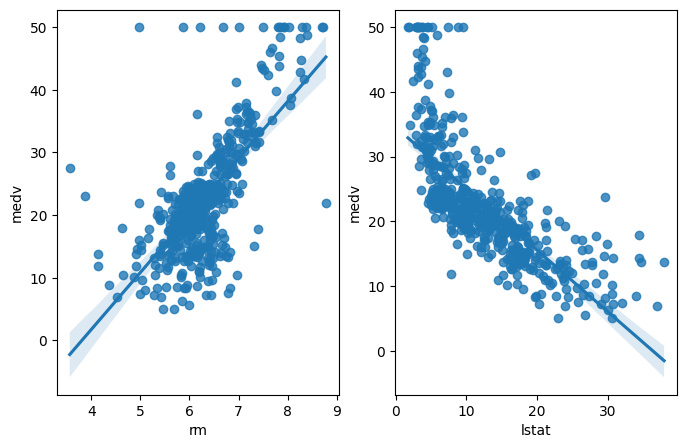

In [21]:
fig, axes = plt.subplots(1,2, figsize=(8,5))

sns.regplot(ax = axes[0], x="rm", y="medv", data=boston)
sns.regplot(ax = axes[1], x="lstat", y="medv", data=boston)

In [23]:
X = boston[["rm", "lstat"]]
y = boston["medv"]

In [25]:
X.head()

,rm,lstat
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33


In [26]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [87]:
reg = DecisionTreeRegressor()

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8446, test_size=.3)

In [89]:
reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [90]:
y_pred = reg.predict(X_train)

In [91]:
df_pred = pd.DataFrame({"y_pred": y_pred, "y_train": y_train})

In [92]:
df_pred.reset_index(drop=True)

,y_pred,y_train
0,41.3,41.3
1,20.3,20.3
2,22.4,22.4
3,29.4,29.4
4,8.5,8.5
...,...,...
349,19.6,19.6
350,22.0,22.0
351,21.1,21.1
352,22.7,22.7


<Axes: xlabel='y_pred', ylabel='y_train'>

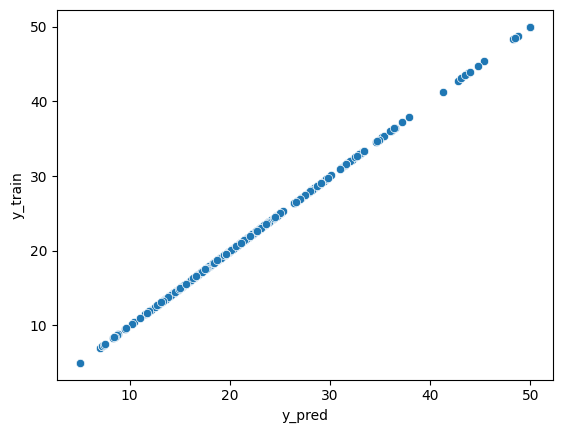

In [93]:
sns.scatterplot(x="y_pred", y="y_train", data=df_pred)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [95]:
path = reg.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 1.41242938e-05, 1.41242938e-05, 1.41242938e-05,
        1.41242938e-05, 1.41242938e-05, 1.41242938e-05, 1.41242938e-05,
        1.41242938e-05, 1.41242938e-05, 1.41242938e-05, 5.64971751e-05,
        5.64971751e-05, 5.64971751e-05, 5.64971751e-05, 5.64971751e-05,
        5.64971751e-05, 5.64971751e-05, 5.64971751e-05, 5.64971751e-05,
        5.64971751e-05, 5.64971751e-05, 5.64971751e-05, 5.64971751e-05,
        5.64971751e-05, 5.64971751e-05, 1.27118644e-04, 1.27118644e-04,
        1.27118644e-04, 1.27118644e-04, 1.27118644e-04, 1.27118644e-04,
        1.27118644e-04, 1.27118644e-04, 1.27118644e-04, 1.69491525e-04,
        2.25988701e-04, 2.25988701e-04, 2.25988701e-04, 2.25988701e-04,
        2.25988701e-04, 2.25988701e-04, 2.30696798e-04, 2.91902072e-04,
        3.49576271e-04, 3.53107345e-04, 3.53107345e-04, 3.53107345e-04,
        3.53107345e-04, 3.53107345e-04, 3.81355932e-04, 3.81355932e-04,
        4.70809793e-04, 5.08474576e-04, 5.08474576

In [97]:
ccp_alphar, impurities = path.ccp_alphas, path.impurities

Text(0.5, 0, 'Alpha efetivo')

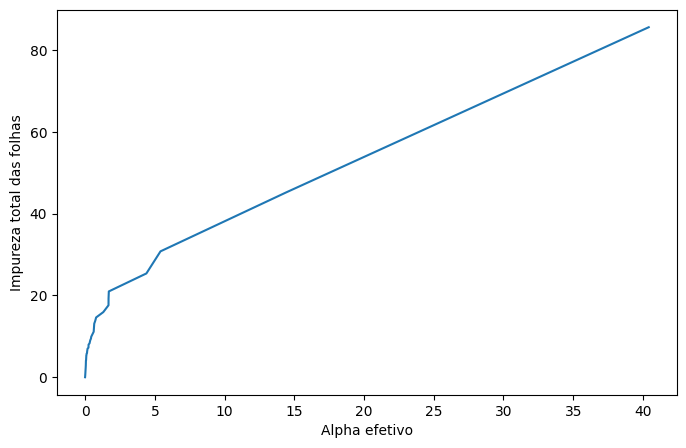

In [101]:
fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x=ccp_alphar, y=impurities)
ax.set_ylabel("Impureza total das folhas")
ax.set_xlabel("Alpha efetivo")

##### Como já era de se esperar, conforme o Alpha aumenta, a Impureza, que para esse caso é o MSE(Mean Squared Error) aumenta também

### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [104]:
clfs = list()

for alpha in ccp_alphar:
    clf = DecisionTreeRegressor(ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [116]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

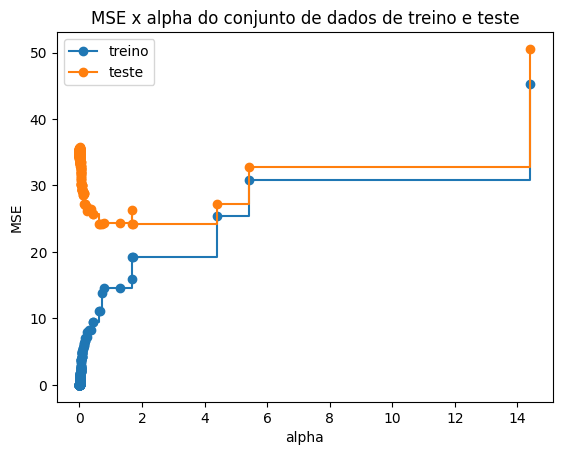

In [117]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

##### O gráfico acima mostra que para uma base de treino o melhor ccp seria próximo de 0, ou 0

In [125]:
df_path = pd.DataFrame(path)

In [126]:
df_path.head()

,ccp_alphas,impurities
0,0.000000,-7.189729e-14
1,0.000014,1.412429e-05
2,0.000014,2.824859e-05
3,0.000014,4.237288e-05
4,0.000014,5.649718e-05


Olhando no paht o ccp ideal seria ``0.000014``

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [127]:
reg = DecisionTreeRegressor(ccp_alpha=0.000014)

In [129]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=1.4e-05)

<Axes: ylabel='medv'>

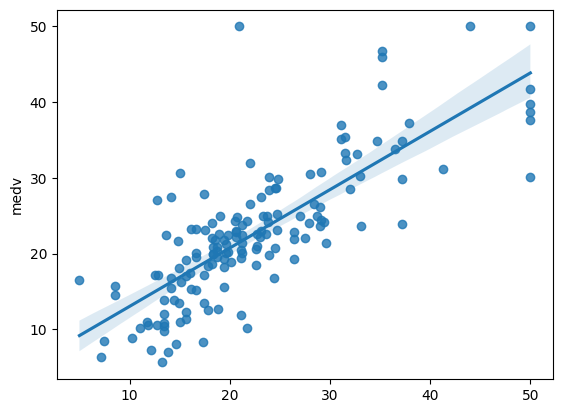

In [143]:
sns.regplot(x=reg.predict(X_test), y=y_test)

### 7. Visualize esta árvore.

In [139]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(reg, out_file=None, 
                                feature_names=boston[["rm", "lstat"]].columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png", filename="arvore1") 
graph.render()

'arvore1.png'

Por ser uma árvore muito grande, ela foi upada em um arquivo a parte para a melhor vizualização